## Objective of the notebook

 Heart Disease 자료를 탐색하고, 심장질환을 분류하기 위해 sklearn의 모든 분류모형 테스트하고 그 과정을 알아보고자 한다.
 


## About the dataset: Heart Disease

 심장질환 자료는 총 76개의 속성으로 이루어져 있으나, 공개된 모든실험에서 사용한 14개 속성으로 이루어진 자료를 이용하고자 한다. 최근까지 연구된 Cleveland database(n=303)를 이용하였으며, 총 303명의 환자자료 중 164명이 심장질환이었다.
 
 14개 자료 필드는 아래의 표와 같다.
 
 변수명 | 설명 | 척도
 ---|---|---
age| 환자 나이 | 구간-비율
sex| 환자성별 (1 = male; 0 = female) | 명목
cp| 흉통유형 (1=정형 협심증 통증, 2=비정형 협심증 통증, 3=비협심증 통증(협심증 관련통증 아님), 4=무증상) | 명목
trestbps | 휴식시 혈압(병원 입원시, mm Hg) | 비율
chol| 총콜레스테롤, mg/dl | 비율
fbs| 공복시 혈당, > 120 mg/dl) (1 = true; 0 = false) | 명목
restecg| 심전도 결과 | 명목
thalach| 최대 심박수 | 비율
exang| 운동형 협심증 여부(1 = yes; 0 = no) | 명목
oldpeak| ST depression induced by exercise relative to rest | 비율
slope| ST segment의 경사 (1=upsloping, 2=flat, 3=downsloping) | 명목
ca| 채색된 주요 혈관수 (0-3) | 구간
thal| 결손된 혈관 3 = normal; 6 = fixed defect; 7 = reversable defect | 명목
target| 심장질환 여부 1 or 0(target) | 명목

In [1]:
#자료 불러오기 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
heartData = pd.read_csv('heart.csv')

In [2]:
heartData.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#자료의 결측치 갯수 확인
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# 카테고리와 연속 feature name
cat_feature_list = ['sex','cp','restecg','exang','slope','ca','thal']
num_feature_list = ['age','trestbps','chol','fbs','thalach','oldpeak']

In [6]:
#카테고리 변수 속성변경
for i in cat_feature_list:
    heartData[i]=pd.Categorical(heartData[i])

In [7]:
#보기 좋게 수정 필요
for i in cat_feature_list:
    print(heartData[i].value_counts(), (heartData[i].value_counts()/heartData[i].count())*100)

1    207
0     96
Name: sex, dtype: int64 1    68.316832
0    31.683168
Name: sex, dtype: float64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64 0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64
1    152
0    147
2      4
Name: restecg, dtype: int64 1    50.165017
0    48.514851
2     1.320132
Name: restecg, dtype: float64
0    204
1     99
Name: exang, dtype: int64 0    67.326733
1    32.673267
Name: exang, dtype: float64
2    142
1    140
0     21
Name: slope, dtype: int64 2    46.864686
1    46.204620
0     6.930693
Name: slope, dtype: float64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64 0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
Name: ca, dtype: float64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64 2    54.785479
3    38.613861
1     5.940594
0     0.660066
Name: thal, dtype: float64


In [8]:
heartData[num_feature_list].describe()

,age,trestbps,chol,fbs,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,149.646865,1.039604
std,9.082101,17.538143,51.830751,0.356198,22.905161,1.161075
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,0.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,1.000000,202.000000,6.200000


In [9]:
# 타겟(심장질환) 환자수 확인
print('number of Heart disease patient =', heartData[(heartData['target'] ==1) ].count()[1])

number of Heart disease patient = 165


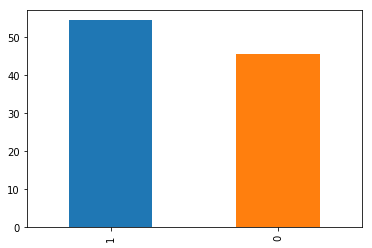

1    54.455446
0    45.544554
Name: target, dtype: float64


In [10]:
(heartData['target'].value_counts()/heartData['target'].count()*100).plot(kind='bar')
plt.show()
print(heartData['target'].value_counts()/heartData['target'].count()*100)

In [11]:
# 연령 구분하기 
#연령을 범위로 구분하기
labels = ["{0} - {1}".format(i, i + 5) for i in range(26, 80, 5)]
heartData['age']=heartData.age.astype('int64')
heartData['age'] = pd.cut(heartData.age, range(25, 85, 5), right=False, labels=labels)

In [12]:
# Target과 features  분리
target_dt = heartData['target']
features_dt = heartData.drop(columns = ['target'], axis = 1)

In [13]:
target_dt.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
# one-hot-encoding 
features_dt_dm =  pd.get_dummies(features_dt)

In [15]:
# Train데이터와 Test를 나눈다.
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dt_dm, target_dt, random_state=20181201)

In [16]:
X_train.head()

,trestbps,chol,fbs,thalach,oldpeak,age_26 - 31,age_31 - 36,age_36 - 41,age_41 - 46,age_46 - 51,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
284,140,207,0,138,1.9,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
97,108,233,1,147,0.1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
271,134,234,0,145,2.6,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
219,130,256,1,150,0.0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
106,160,234,1,131,0.1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
print(y_train.shape)
print(X_train.shape)

(227,)
(227, 39)


# 분류 모형

### DecisionTreeClassifier
---
    의사결정나무는 의사 결정 규칙을 학습하여 대상 변수의 값을 예측하는 모델이다.
    여러 특징 중 하나의 특징을 선택하고 그 특징에 대한 기준값(threshold)을 정하여 구분하는데 이를 분류 규칙(분할기준)이라고 한다.
    규칙을 정하는 방법은 부모노드(상위노드)와 자식노드(하위노드)간의 정보획득량(information gain)를 가장 낮게 만드는 특징과 기준값을 찾는 것이다. 
    정보획득량이란 정보이론에서 다루는데 어떤 특징이 얼마만큼의 정보를 줄수 있는지를 수치화 한 값이다.
    순도(homogeneity)가 증가하고, 불순도(impurity) 또는 불확실성(uncertainty)이 최대로 감소하는 방향으로 학습을 한다.
    
    의사결정나무에서는 지니계수(Gini index)와 엔트로피 불확실성(entropy)를 주로 사용한다. 
    
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

In [18]:
# 기초 모형
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
model.score(X_test, y_test)

0.7368421052631579

In [20]:
feature_names = X_test.columns
target_names = ['normal','patient']

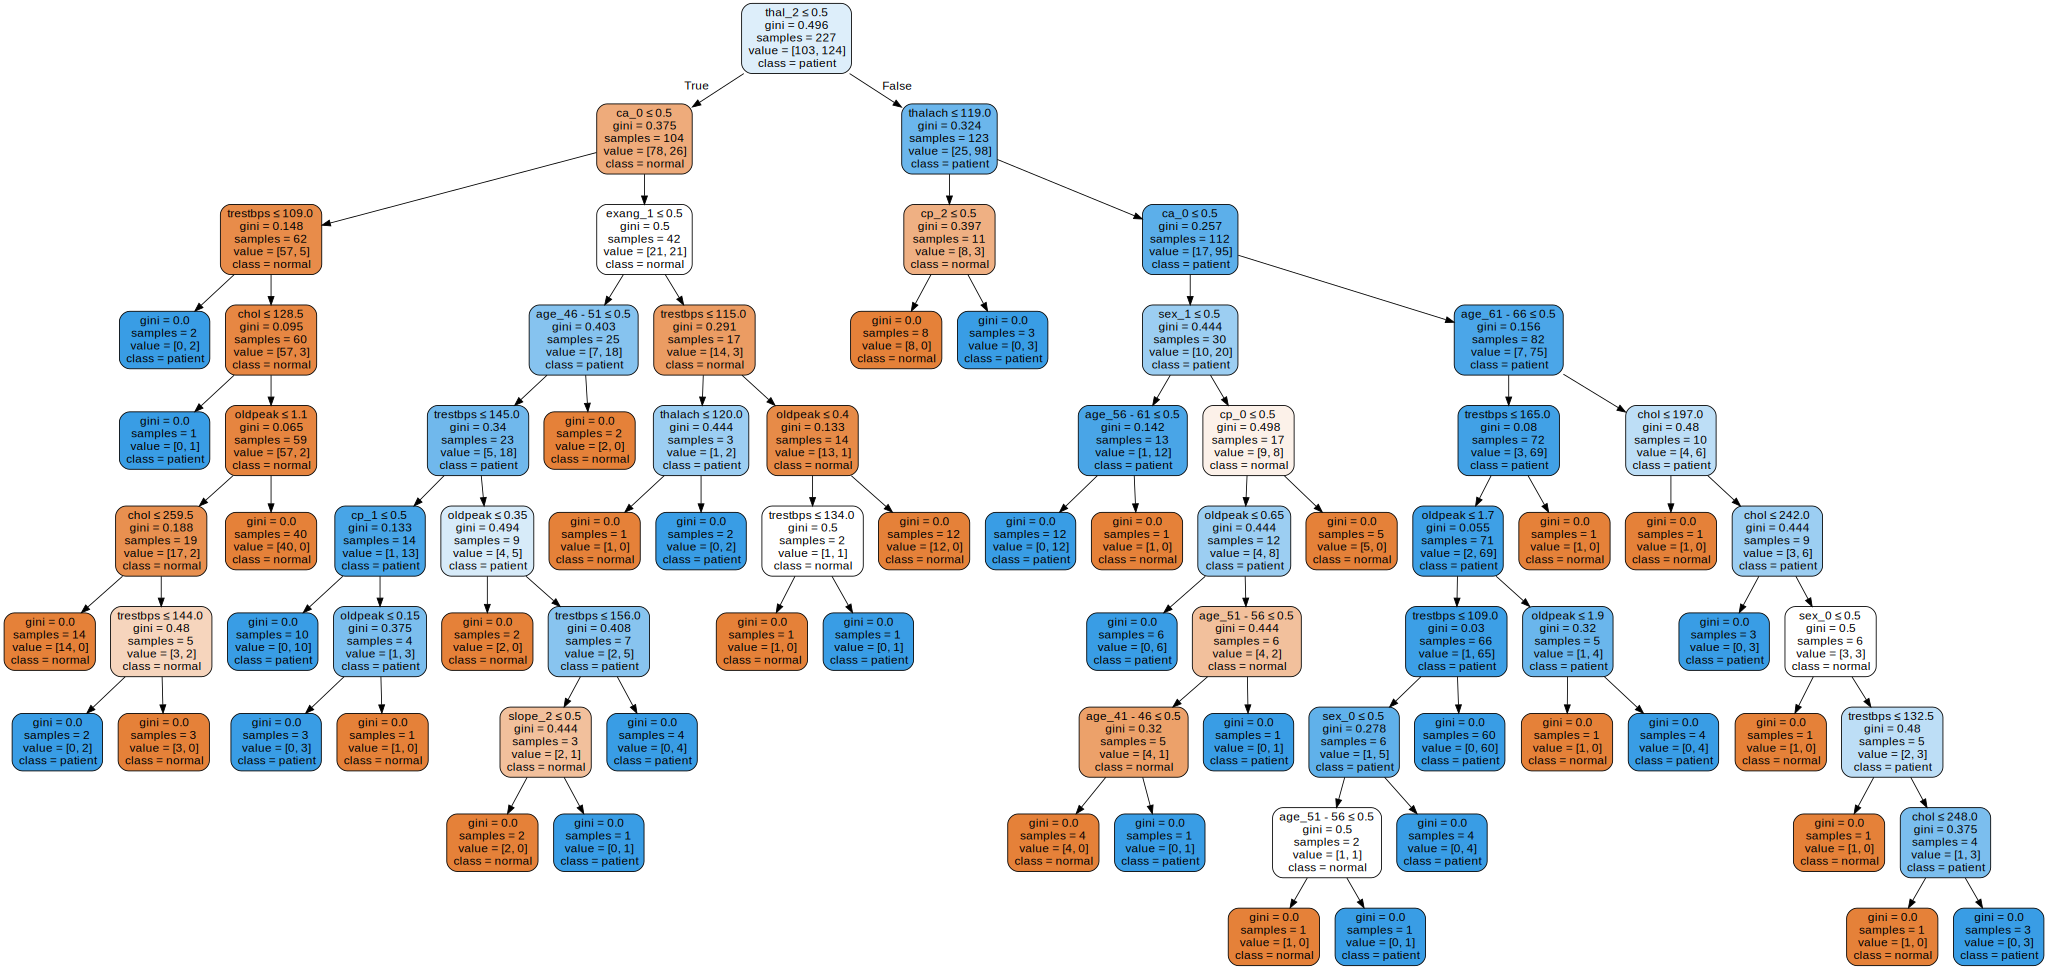

In [21]:
# 의사결정 나무 도식화
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data)
graph

#### 그리드 서치를 통하여 매개변수를 변화시켜 최적의 모형을 찾는다
---
    의사결정나무에서 중요한 매개변수는 깊이와 잎의 수이다.

In [22]:
#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, random_state=20181201)

In [23]:
%%time
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier

random=[20181201]

model = DecisionTreeClassifier()

# 규칙기준
criterions = ['gini','entropy']
dep_n = np.arange(1,20,1)
max_depth = dep_n

max_features = ['auto','log2']

param_grid = dict(criterion=criterions, max_depth=max_depth, max_features=max_features, random_state=random)
grid_dtc = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=kfold, verbose=1)
grid_result=grid_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Wall time: 2.37 s


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    2.2s finished


In [24]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['rank_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.853378 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'random_state': 20181201}
16.000000 (0.038708) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'auto', 'random_state': 20181201}
16.000000 (0.038708) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'random_state': 20181201}
13.000000 (0.036573) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'random_state': 20181201}
12.000000 (0.040845) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'random_state': 20181201}
7.000000 (0.017603) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'random_state': 20181201}
31.000000 (0.040427) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'random_state': 20181201}
3.000000 (0.044195) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'random_state': 20181201}
37.000000 (0.023096) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log

In [25]:
grid_result.score(X_test, y_test)

0.7777777777777778

In [26]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pred = grid_result.predict(X_test)

print("f1: {:.3f}".format(f1_score(y_test, pred)))
print("recall: {:.3f}".format(recall_score(y_test, pred)))
print("precision_score: {:.3f}".format(precision_score(y_test, pred)))

f1: 0.778
recall: 0.854
precision_score: 0.714


In [27]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[21 14]
 [ 6 35]]


([<matplotlib.axis.YTick at 0x1cdb4a8b518>,
 <a list of 2 Text yticklabel objects>)

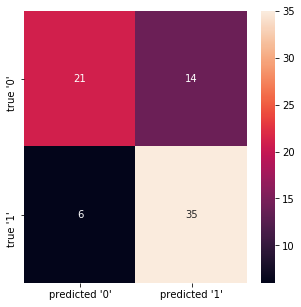

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)

그리드서치를 통해 찾은 최적 매개변수는 Best: 0.853378 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'} 이다.

테스트 스코어는 0.778이다. 정밀도는 0.714이며, 재현율은 0.854이다.
오차 행렬을 보면 진양성은 35, 진음성은 21, 위양성은 6, 위음성이 14이다. 
심장환자 41명중 35명을 분류하였으나, 6명을 정상인으로 잘 못 분류하였다.

### RandomForestClassifier
---
    랜덤포레스트는 여러 개의 결정 트리들을 임의적으로 학습하는 방식의 앙상블 방법의 하나이다.
    훈련 과정에서 구성한 결정 트리로부터 분류를 함으로써 동작한다.
    

In [98]:
# 기본 모형
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=20181201).fit(X_train, y_train)

In [99]:
model.score(X_test, y_test)

0.7236842105263158

In [100]:
#교차 검증을 위해 k-fold 객체를 생성한다. 
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=10, random_state=20181201)

In [101]:
%%time
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
random=[20181201]

dep_n = np.arange(1,20,1)
n_estimators = [10, 30, 60]
max_features = ['auto','log2']
param_grid = dict(n_estimators=n_estimators, max_depth=dep_n, max_features=max_features, random_state=random)

grid_rfc = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=kfold, verbose=1)

grid_result=grid_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 114 candidates, totalling 1140 fits
Wall time: 50.3 s


[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:   50.1s finished


In [102]:
#for k in grid_result.cv_results_.keys():
#    print(k)

In [103]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['rank_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.890356 using {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 30, 'random_state': 20181201}
42.000000 (0.066371) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 20181201}
4.000000 (0.066208) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 30, 'random_state': 20181201}
43.000000 (0.064335) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 60, 'random_state': 20181201}
53.000000 (0.068180) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 10, 'random_state': 20181201}
1.000000 (0.057446) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 30, 'random_state': 20181201}
2.000000 (0.056318) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 60, 'random_state': 20181201}
3.000000 (0.053813) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 20181201}
14.000000 (0.058152) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 30, 'random_st

In [104]:
grid_result.score(X_test, y_test)

0.8571428571428571

In [105]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pred = grid_result.predict(X_test)

print("f1: {:.3f}".format(f1_score(y_test, pred)))
print("recall: {:.3f}".format(recall_score(y_test, pred)))
print("precision_score: {:.3f}".format(precision_score(y_test, pred)))

f1: 0.857
recall: 0.951
precision_score: 0.780


In [106]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[24 11]
 [ 2 39]]


([<matplotlib.axis.YTick at 0x1cdb897b438>,
 <a list of 2 Text yticklabel objects>)

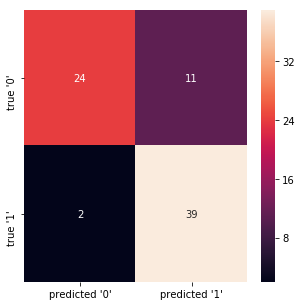

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)

그리드서치를 통해 찾은 최적 매개변수는 Best: 0.890356 using {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 30}이다. 
테스트 스코어는 0.857이며, 재현율(전체 양성 중 양성분류) 0.951, 정확도(양성으로 예측한 것 중 진짜 양성비율) 0.780이다. 
오차행렬을 보면 진양성 37, 진음성 24, 위양성 2, 위음성 11이다. 
의사결정나무에 비해서  위양성이 줄었으며, 정확도가 소폭 상승하였다.

### C-Support Vector Classification
---
    커널 서포트 벡터 머신은 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.
    선형 판별 함수 기반 모형은 XOR(exclusive OR)문제를 풀지 못한다는 단점이 있다.
    선형 판별이란 데이터의 분포를 학습하여 결정 경계(Decision boundary)를 만들어 데이터를 분류하는 방법인데, XOR 문제의 경우 선형 판별 평면이라고 하는 영역으로 나눌 수 없기 때문이다. 

In [39]:
from sklearn.svm import SVC
base_model = SVC(random_state=20181201).fit(X_train, y_train)
base_model.score(X_test, y_test)

0.5394736842105263

In [63]:
from sklearn.metrics import confusion_matrix
pred = base_model.predict(X_test)
confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[ 6 29]
 [ 6 35]]


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

model = SVC(degree=3)

random=[20181201]

coefs = [0.5, 1, 2]

c_n = np.arange(1,10,1)
#c_n = np.arange(1, 2, 5)
#cache_size = [100, 200]
#패널티, 기본값 1
Cs = c_n
kernels  = ['rbf', 'sigmoid', 'poly']
gammas  = ['auto', 'scale']
param_grid = dict(C=Cs, kernel=kernels, random_state=random)


grid_svm = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, verbose=1, n_jobs=-1)

grid_result=grid_svm.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min


SVM의 경우 f1스코어로 그리드서치할 경우 재현율이 1인 최적화를 찾는다!?

In [109]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['rank_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.890356 using {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 30, 'random_state': 20181201}
42.000000 (0.066371) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 20181201}
4.000000 (0.066208) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 30, 'random_state': 20181201}
43.000000 (0.064335) with: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 60, 'random_state': 20181201}
53.000000 (0.068180) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 10, 'random_state': 20181201}
1.000000 (0.057446) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 30, 'random_state': 20181201}
2.000000 (0.056318) with: {'max_depth': 1, 'max_features': 'log2', 'n_estimators': 60, 'random_state': 20181201}
3.000000 (0.053813) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 10, 'random_state': 20181201}
14.000000 (0.058152) with: {'max_depth': 2, 'max_features': 'auto', 'n_estimators': 30, 'random_st

In [110]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
pred = grid_result.predict(X_test)

print("f1: {:.3f}".format(f1_score(y_test, pred)))
print("recall: {:.3f}".format(recall_score(y_test, pred)))
print("precision_score: {:.3f}".format(precision_score(y_test, pred)))

f1: 0.857
recall: 0.951
precision_score: 0.780


In [111]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[24 11]
 [ 2 39]]


([<matplotlib.axis.YTick at 0x1cdb853aa20>,
 <a list of 2 Text yticklabel objects>)

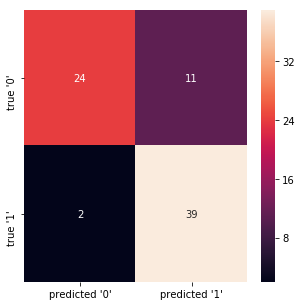

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion, annot=True, fmt="d")
plt.xticks([.5, 1.5], ["predicted '0'", "predicted '1'"], size=10)
plt.yticks([.5, 1.5], ["true '0'", "true '1'"], size=10)

In [ ]:
def plot_xor(X, y, model, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y== 1, 0], X[y== 1, 1], c='b', marker='o', label='+1', s=100)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', marker='s', label='-1', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.show()
    
plot_xor(X_test, y_test)